<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/TensorFlow_Hub_modules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Hub: 
##lets you search and discover hundreds of trained, ready-to-deploy machine learning models in one place. From `tensorflow_hub`, you can download parts of deep learning models, called modules, for transfer learning or for your own applications.

## Let's first take a look at Tensorflow Hub modules [here](https://www.tensorflow.org/hub), and [home webpage](https://tfhub.dev).

 We will be using Google's MobileNet v1 model, available on Tensorflow Hub: [`imagenet/mobilenet_v1_050_160/classification`](https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4)

 Mobilenets come in various sizes controlled by a multiplier for the depth (number of features) in the convolutional layers. They can also be trained for various sizes of input images to control inference speed. This TF Hub model uses the TF-Slim implementation of mobilenet_v1_050 with a depth multiplier of 0.5 and an input size of 160x160 pixels.

In [4]:
import tensorflow as tf
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"
model = tf.keras.models.Sequential([
                                    hub.KerasLayer(module_url)]) 

In [6]:
model.build(input_shape=[None, 160, 160,3])

The output is a batch of logits vectors. The indices into the logits are the num_classes = 1001 classes of the classification from the original training (see above). The mapping from indices to class labels can be found in the file at download.tensorflow.org/data/ImageNetLabels.txt (with class 0 for "background", followed by 1000 actual ImageNet classes).

The input images are expected to have color values in the range [0,1], following the common image input conventions. The expected size of the input images is height x width = 160 x 160 pixels by default, but other input sizes are possible (within limits).



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              1343049   
Total params: 1,343,049
Trainable params: 0
Non-trainable params: 1,343,049
_________________________________________________________________


Well, it's actually only got one layer according to the model.summary(). So this is one `KerasLayer` with 1.3 million parameters. So it's got quite a bit fewer parameters than last time (see the `Loading_pre_trained_keras_models.ipynb`). So in the Keras Application, we'll have 25 million. Also the Keras Application model had this huge, long model.summary() with many layers. This one looks like it's only got one layer. That's of course a bit of a simplification. So it's because we have a **module** which becomes a layer, it looks like it's only one. And notice how all these parameters, 1.3, they're actually all **non-trainable**. So for the other model, almost all the parameters were trainable. So we can only use this model to do forward passes with it. That's okay for the moment. Let's go ahead and play the same game. 

So we are going to load in the same three images, a lemon image, the viaduct image, and the water_tower image. 

In [10]:
# Import three sample images

!wget -q -O lemon.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1JSgQ9qgi9nO9t2aGEk-zA6lzYNUT9vZJ" 
!wget -q -O viaduct.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1sQzMKmyCR5Tur19lP3n1IIlEMG_o6Mct"
!wget -q -O water_tower.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1cPAQD1O6mAiMbg0fmG5HIk8OuO_BSC6J"

In [11]:
ls -lh

total 16K
-rw-r--r-- 1 root root 1.5K Feb 26 18:52 lemon.jpg
drwxr-xr-x 1 root root 4.0K Feb 24 17:49 sample_data/
-rw-r--r-- 1 root root 1.8K Feb 26 18:52 viaduct.jpg
-rw-r--r-- 1 root root 2.0K Feb 26 18:52 water_tower.jpg


In [12]:
pwd

'/content'

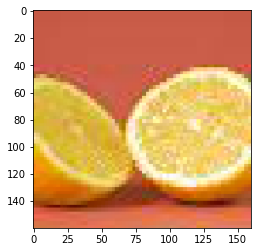

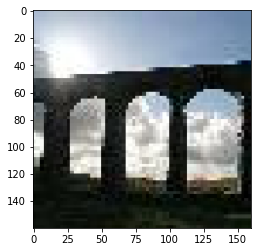

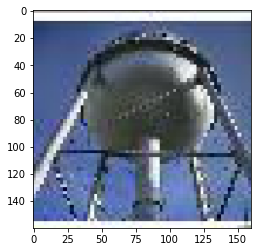

In [22]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
# Plot sample images

lemon_img = load_img('/content/lemon.jpg', target_size=(160, 160))
viaduct_img = load_img('/content/viaduct.jpg', target_size=(160, 160))
water_tower_img = load_img('/content/water_tower.jpg', target_size=(160, 160))

plt.imshow(lemon_img)
plt.figure()
plt.imshow(viaduct_img)
plt.figure()
plt.imshow(water_tower_img)

In [26]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet import preprocess_input
import numpy as np

x = img_to_array(lemon_img)[np.newaxis, ...]
x = preprocess_input(x)
print(x.shape)

(1, 160, 160, 3)


In [33]:
preds = model.predict(x)
print(preds)
print(preds.shape)

[[-3.6444159 -2.8987195 -0.8876006 ... -2.8358524 -0.868549   1.7892141]]
(1, 1001)


We need the categories of imagenet. At this moment I do not find them to continue this exercise!